845.34678 
845.34678 


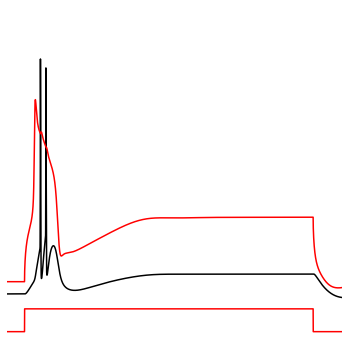

	-78.466752 
	-78.466752 


In [1]:
import os
import sys
import numpy as np
import neuron
from neuron import h
from neuron.units import ms, mV
from neuron import gui
from matplotlib import pyplot as plt
import csv
from math import exp, log
import scipy

h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
h.load_file("L5PCbiophys5c.hoc")
h.load_file("L5PCtemplate_2.hoc")
L5PC = h.L5PCtemplate(morphology_file)
h.celsius = 37



   
plt.rcParams['figure.figsize'] = [6,6]      
f, (ax0, ax01) = \
plt.subplots(2, gridspec_kw={'height_ratios': [12, 1]})

for dend_syn_imax, soma_cur, top_ax, bot_ax in [(0, True, ax0, ax01)]:

    t = h.Vector().record(h._ref_t)
    som_v = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
    axon_v = h.Vector().record(L5PC.axon[0](0.5)._ref_v)
    distal_v = h.Vector().record(L5PC.apic[36](0.9)._ref_v)
    proximal_v = h.Vector().record(L5PC.apic[20](0.5)._ref_v)

    current_epsp = h.epsp(L5PC.apic[36](0.9))
    current_epsp.tau0 = 0.6
    current_epsp.tau1 = 7
    current_epsp.imax = dend_syn_imax
    current_epsp.onset = 505

    current_som = h.IClamp(L5PC.apic[36](0.9))
    current_som.delay = 500
    current_som.dur = 500 if soma_cur else 0
    current_som.amp = 0.6

    soma_cur = h.Vector().record(current_som._ref_i)
    # ca_cur = h.Vector().record(L5PC.apic[36](0.9).Ca_HVA._ref_ica)
    # k3_cur = h.Vector().record(L5PC.apic[36](0.9).SKv3_1._ref_ik)
    # e2_cur = h.Vector().record(L5PC.apic[36](0.9).SK_E2._ref_ik)
    # na_cur = h.Vector().record(L5PC.apic[36](0.9).NaTa_t._ref_ina)
    # im_cur = h.Vector().record(L5PC.apic[36](0.9).Im._ref_ik)
    # ih_cur = h.Vector().record(L5PC.apic[36](0.9).Ih._ref_ihcn)
    cur_i = h.Vector().record(current_epsp._ref_i)

    v_rest = -80.28

    h.finitialize(v_rest*mV)
    h.continuerun(1250*ms)

    #top_ax.plot(t, axon_v, 'orange', linewidth=1.5, label='soma')
    top_ax.plot(t, som_v, 'k', linewidth=1.5, label='soma')
    top_ax.plot(t, distal_v, 'r', linewidth=1.5, label='distal dend')
    #top_ax.plot(t, proximal_v, 'b', linewidth=1, label='proximal dend')
    top_ax.set(ylim=(-85,60), xlim=(470,1050))
    top_ax.get_xaxis().set_ticks([])
    top_ax.get_yaxis().set_ticks([])
    top_ax.spines['top'].set_visible(False)
    top_ax.spines['right'].set_visible(False)
    top_ax.spines['bottom'].set_visible(False)
    top_ax.spines['left'].set_visible(False)
    # top_ax.legend()

    #bot_ax.plot(t, ca_cur, 'b', label='soma')
    #bot_ax.plot(t, na_cur, 'k', label='soma')
    #bot_ax.plot(t, ih_cur, 'r', label='soma')
    #bot_ax.plot(t, im_cur, 'y', label='soma')
    #bot_ax.plot(t, k3_cur, 'm', label='soma')
    #bot_ax.plot(t, e2_cur, 'c', label='soma')
    bot_ax.plot(t, soma_cur, 'r', label='soma')
    bot_ax.set(xlim=(470,1050))
    #top_ax.axhline(y=v_rest, color='k', linestyle=':', linewidth=1)
    bot_ax.get_xaxis().set_ticks([])
    bot_ax.get_yaxis().set_ticks([])
    bot_ax.spines['top'].set_visible(False)
    bot_ax.spines['right'].set_visible(False)
    bot_ax.spines['bottom'].set_visible(False)
    bot_ax.spines['left'].set_visible(False)
    plt.subplots_adjust(wspace=0, hspace=0)


plt.show()



